In this chapter, we'll learn some functions from the library `sklearn` that will be useful in:

1. Splitting the data into `train` and `test`

2. Scaling data

3. Fitting a model

4. Computing model performance metrics

4. Tuning model hyperparameters* to optimize the desired performance metric

\**In machine learning, a model hyperparameter is a parameter that cannot be learned from training data and must be set before training the model. Hyperparameters control aspects of the model's behavior and can greatly impact its performance. For example, the regularization parameter $\lambda$, in linear regression is a hyperparameter. You need to specify it before fitting the model. On the other hand, the beta coefficients in linear regression are parameters, as you learn them while training the model, and don't need to specify their values beforehand.*


We'll use a classfication problem to illustrate the functions. However, similar functions can be used for regression problems, i.e., prediction problems with a continuous response.

In [67]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.35)

Let us import the `sklearn` modules useful in developing statistical models.

In [119]:
# sklearn has 100s of models - grouped in sublibraries, such as linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

# sklearn has many tools for cleaning/processing data, also grouped in sublibraries
# splitting one dataset into train and test, computing cross validation score, cross validated prediction
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

#sklearn module for scaling data
from sklearn.preprocessing import StandardScaler

#sklearn modules for comuting the performance metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix

In [69]:
#Reading data
data = pd.read_csv('./Datasets/diabetes.csv')

Scikit-learn doesn't support the formula-like syntax of specifying the response and the predictors as in the `statsmodels` library. We need to create separate objects for predictors and response, which should be *array-like*. A Pandas DataFrame / Series or a Numpy array are *array-like* objects.

Let us reference our predictors as object `X`, and the response as object `y`.

In [70]:
# Separating the predictors and response - THIS IS HOW ALL SKLEARN OBJECTS ACCEPT DATA (different from statsmodels)
y = data.Outcome
X = data.drop("Outcome", axis = 1)

## Splitting data into `train` and `test`

Let us create train and test datasets for developing a model to predict if a person has diabetes.

In [71]:
# Creating training and test data
    # 80-20 split, which is usual - 70-30 split is also fine, 90-10 is fine if the dataset is large
    # random_state to set a random seed for the splitting - reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

Let us find the proportion of classes (*'having diabetes' ($y = 1$) or 'not having diabetes' ($y = 0$)*) in the complete dataset.

In [72]:
#Proportion of 0s and 1s in the complete data
y.value_counts()/y.shape

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Let us find the proportion of classes (*'having diabetes' ($y = 1$) or 'not having diabetes' ($y = 0$)*) in the train dataset.

In [73]:
#Proportion of 0s and 1s in train data
y_train.value_counts()/y_train.shape

0    0.644951
1    0.355049
Name: Outcome, dtype: float64

In [74]:
#Proportion of 0s and 1s in test data
y_test.value_counts()/y_test.shape

0    0.675325
1    0.324675
Name: Outcome, dtype: float64

We observe that the proportion of 0s and 1s in the `train` and `test` dataset are slightly different from that in the complete `data`. In order for these datasets to be more representative of the population, they should have a proportion of 0s and 1s similar to that in the complete dataset. This is especially critical in case of imbalanced datasets, where one class is represented by a significantly smaller number of instances than the other(s).

When training a classification model on an imbalanced dataset, the model might not learn enough about the minority class, which can lead to poor generalization performance on new data. This happens because the model is biased towards the majority class, and it might even predict all instances as belonging to the majority class.

### Stratified splitting

We will use the argument `stratify` to obtain a proportion of 0s and 1s in the `train` and `test` datasets that is similar to the proportion in the complete `data.

In [75]:
#Stratified train-test split
X_train_stratified, X_test_stratified, y_train_stratified,\
y_test_stratified = train_test_split(X, y, test_size = 0.2, random_state = 45, stratify=y)

In [76]:
#Proportion of 0s and 1s in train data with stratified split
y_train_stratified.value_counts()/y_train.shape

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [77]:
#Proportion of 0s and 1s in test data with stratified split
y_test_stratified.value_counts()/y_test.shape

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

The proportion of the classes in the stratified split mimics the proportion in the complete dataset more closely.

By using stratified splitting, we ensure that both the `train` and `test` data sets have the same proportion of instances from each class, which means that the model will see enough instances from the minority class during training. This, in turn, helps the model learn to distinguish between the classes better, leading to better performance on new data.

Thus, stratified splitting helps to ensure that the model sees enough instances from each class during training, which can improve the model's ability to generalize to new data, particularly in cases where one class is underrepresented in the dataset.

Let us develop a logistic regression model for predicting if a person has diabetes.

## Scaling data

In certain models, it may be important to scale data for various reasons. In a logistic regression model, scaling can help with model convergence. Scikit-learn uses a method known as gradient-descent *(not in scope of the syllabus of this course)* to obtain a solution. In case the predictors have different orders of magnitude, the alogrithm may fail to converge. In such cases, it is useful to standaridize the predictors so that all of them are at the same scale.

In [78]:
# With linear/logistic regression in scikit-learn, especially when the predictors have different orders 
# of magn., scaling is necessary. This is to enable the training algo. which we did not cover. (Gradient Descent)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # Do NOT refit the scaler with the test data, just transform it.

## Fitting a model

Let us fit a logistic regression model for predicting if a person has diabetes. Let us try fitting a model with the un-scaled data.

In [79]:
# Create a model object - not trained yet
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

C:\Users\akl0407\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Note that the model with the un-scaled predictors fails to converge. Check out the data `X_train` to see that this may be probably due to the predictors have different orders of magnitude. For example, the predictor `DiabetesPedigreeFunction` has values in \[0.078, 2.42\], while the predictor `Insulin` has values in \[0, 800\].

Let us fit the model to the scaled data.

In [80]:
# Create a model - not trained yet
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

The model converges to a solution with the scaled data!

The coefficients of the model can be returned with the `coef_` attribute of the `LogisticRegression()` object. However, the output is not as well formatted as in the case of the `statsmodels` library since `sklearn` is developed primarily for the purpose of prediction, and not inference.

In [81]:
# Use coef_ to return the coefficients - only log reg inference you can do with sklearn
print(logreg.coef_) 

[[ 0.32572891  1.20110566 -0.32046591  0.06849882 -0.21727131  0.72619528
   0.40088897  0.29698818]]


## Computing performance metrics

### Accuracy

Let us test the model prediction accuracy on the test data. We'll demonstrate two different functions that can be used to compute model accuracy - `accurace_score()`, and `score()`.

The `accuracy_score()` function from the `metrics` module of the `sklearn` library is general, and can be used for any classification model. We'll use it along with the `predict()` method of the `LogisticRegression()` object, which returns the predicted class based on a threshold probability of 0.5.

In [82]:
# Get the predicted classes first
y_pred = logreg.predict(X_test_scaled)

# Use the predicted and true classes for accuracy
print(accuracy_score(y_pred, y_test)*100) 

73.37662337662337


The `score()` method of the `LogisticRegression()` object can be used to compute the accuracy only for a logistic regression model. Note that for a `LinearRegression()` object, the `score()` method will return the model $R$-squared.

In [83]:
# Use .score with test predictors and response to get the accuracy
# Implements the same thing under the hood
print(logreg.score(X_test_scaled, y_test)*100)  

73.37662337662337


### ROC-AUC

The `roc_curve()` and `auc()` functions from the `metrics` module of the `sklearn` library can be used to compute the ROC-AUC, or the area under the ROC curve. Note that for computing ROC-AUC, we need the predicted probability, instead of the predicted class. Thus, we'll use the `predict_proba()` method of the `LogisticRegression()` object, which returns the predicted probability for the observation to belong to each of the classes, instead of using the `predict()` method, which returns the predicted class based on threshold probability of 0.5. 

In [86]:
#Computing the predicted probability for the observation to belong to the positive class (y=1);
#The 2nd column in the output of predict_proba() consists of the probability of the observation to 
#belong to the positive class (y=1)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1] 

#Using the predicted probability computed above to find ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print(auc(fpr, tpr))# AUC of ROC

0.7923076923076922


### Confusion matrix & precision-recall

The `confusion_matrix()`, `precision_score()`, and `recall_score()` functions from the `metrics` module of the `sklearn` library can be used to compute the confusion matrix, precision, and recall respectively.

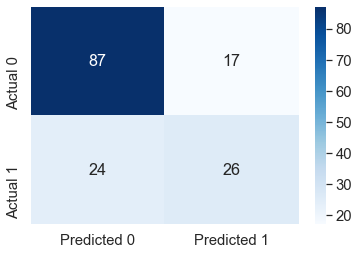

In [87]:
#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [88]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Precision:  0.6046511627906976
Recall:  0.52


Let us compute the performance metrics if we develop the model using stratified splitting.

Accuracy:  78.57142857142857
ROC-AUC:  0.8505555555555556
Precision:  0.7692307692307693
Recall:  0.5555555555555556


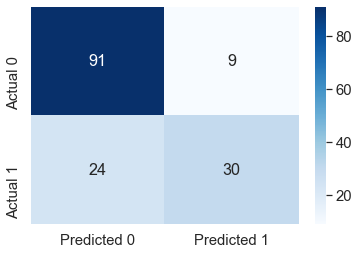

In [111]:
# Developing the model with stratified splitting

#Scaling data
scaler = StandardScaler().fit(X_train_stratified)
X_train_stratified_scaled = scaler.transform(X_train_stratified)
X_test_stratified_scaled = scaler.transform(X_test_stratified) 

# Training the model
logreg.fit(X_train_stratified_scaled, y_train_stratified)

#Computing the accuracy
y_pred_stratified = logreg.predict(X_test_stratified_scaled)
print("Accuracy: ",accuracy_score(y_pred_stratified, y_test_stratified)*100)  

#Computing the ROC-AUC
y_pred_stratified_prob = logreg.predict_proba(X_test_stratified_scaled)[:,1]
fpr, tpr, auc_thresholds = roc_curve(y_test_stratified, y_pred_stratified_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test_stratified, y_pred_stratified))
print("Recall: ", recall_score(y_test_stratified, y_pred_stratified))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_stratified, y_pred_stratified), columns=['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

The model with the stratified train-test split has a better performance as compared to the other model on all the performance metrics!

## Tuning the model hyperparameters

A couple of hyperparameters (among others) that can be trained in a logistic regression model are:

1. Decision thershold probability

2. Regularization parameter

The performance metrics can be computed using a desired value of the threshold probability. Let us compute the performance metrics for a desired threshold probability of 0.3.

Accuracy:  75.32467532467533
ROC-AUC:  0.8505555555555556
Precision:  0.6111111111111112
Recall:  0.8148148148148148


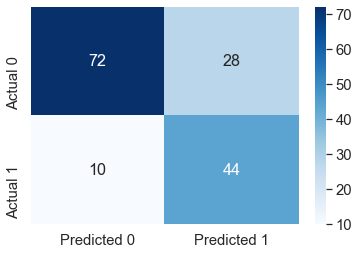

In [58]:
# Performance metrics computation for a desired threshold probability of 0.3
desired_threshold = 0.3

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred_desired_threshold = y_pred_stratified_prob > desired_threshold
y_pred_desired_threshold = y_pred_desired_threshold.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred_desired_threshold, y_test_stratified)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test_stratified, y_pred_stratified_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test_stratified, y_pred_desired_threshold))
print("Recall: ", recall_score(y_test_stratified, y_pred_desired_threshold))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_stratified, y_pred_desired_threshold), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

### Tuning decision threshold probability

Suppose we wish to find the optimal decision threshold probability to maximize accuracy. Note that we cannot use the test dataset to optimize model hyperparameters, as that may lead to overfitting on the test data. We'll use $K$-fold cross validation on train data to find the optimal decision threshold probability.

We'll use the `cross_val_predict()` function from the `model_selection` module of `sklearn` to compute the $K$-fold cross validated predicted probabilities. Note that this function simlifies the task of manually creating the $K$-folds, training the model $K$-times, and computing the predicted probabilites on each of the $K$-folds. Thereafter, the predicted probabilities will be used to find the one the optimal threshold probability that maximizes the classification accuracy.

In [114]:
val_scores = []

hyperparam_vals = np.arange(0,1.01,0.01)
accuracy_iter = []

predicted_probability = cross_val_predict(LogisticRegression(), X_train_stratified_scaled, 
                                              y_train_stratified, cv = 5, method = 'predict_proba')

for threshold_prob in hyperparam_vals:
    predicted_class = predicted_probability[:,1] > threshold_prob
    predicted_class = predicted_class.astype(int)

    #Computing the accuracy
    accuracy = accuracy_score(predicted_class, y_train_stratified)*100
    accuracy_iter.append(accuracy)

Let us visualize the accuracy with change in decision threshold probability.

<AxesSubplot:>

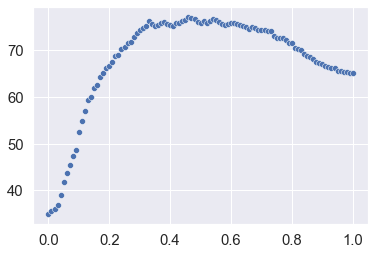

In [118]:
# Accuracy vs decision threshold probability
sns.scatterplot(x = hyperparam_vals, y = accuracy_iter)

The optimal decision threshold probability is the one that maximizes the $K$-fold cross validation accuracy.

In [116]:
# Optimal decision threshold probability
hyperparam_vals[accuracy_iter.index(max(accuracy_iter))]

0.46

Accuracy:  79.87012987012987
ROC-AUC:  0.8505555555555556
Precision:  0.7804878048780488
Recall:  0.5925925925925926


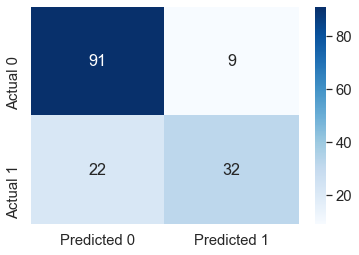

In [110]:
# Performance metrics computation for the optimium decision threshold probability
desired_threshold = 0.46

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred_desired_threshold = y_pred_stratified_prob > desired_threshold
y_pred_desired_threshold = y_pred_desired_threshold.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred_desired_threshold, y_test_stratified)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test_stratified, y_pred_stratified_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test_stratified, y_pred_desired_threshold))
print("Recall: ", recall_score(y_test_stratified, y_pred_desired_threshold))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_stratified, y_pred_desired_threshold), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Model performance on test data has improved with the optimal decision threshold probability.

### Tuning the regularization parameter

The `LogisticRegression()` method has a default *L2* regularization penalty, which means ridge regression.`C` is $1/\lambda$, where $\lambda$ is the hyperparameter that is multiplied with the ridge penalty. `C` is 1 by default.

In [138]:
accuracy_iter = []
hyperparam_vals = 10**np.linspace(-3.5, 1)

for c_val in hyperparam_vals: # For each possible C value in your grid
    logreg_model = LogisticRegression(C=c_val) # Create a model with the C value
    
    accuracy_iter.append(cross_val_score(logreg_model, X_train_stratified_scaled, y_train_stratified,
                                      scoring='accuracy', cv=5)) # Find the cv results

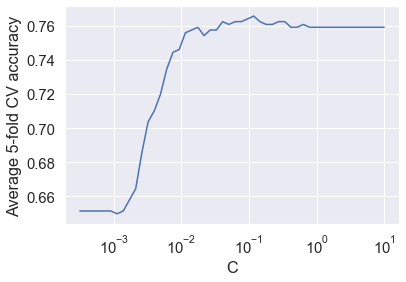

In [162]:
plt.plot(hyperparam_vals, np.mean(np.array(accuracy_iter), axis=1))
plt.xlabel('C')
plt.ylabel('Average 5-fold CV accuracy')
plt.xscale('log')
plt.show()

In [156]:
# Optimal value of the regularization parameter 'C'
optimal_C = hyperparam_vals[np.argmax(np.array(accuracy_iter).mean(axis=1))]
optimal_C

0.11787686347935879

Accuracy:  78.57142857142857
ROC-AUC:  0.8516666666666666
Precision:  0.7837837837837838
Recall:  0.5370370370370371


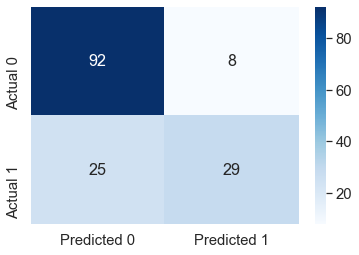

In [157]:
# Developing the model with stratified splitting and optimal 'C'

#Scaling data
scaler = StandardScaler().fit(X_train_stratified)
X_train_stratified_scaled = scaler.transform(X_train_stratified)
X_test_stratified_scaled = scaler.transform(X_test_stratified) 

# Training the model
logreg = LogisticRegression(C = optimal_C)
logreg.fit(X_train_stratified_scaled, y_train_stratified)

#Computing the accuracy
y_pred_stratified = logreg.predict(X_test_stratified_scaled)
print("Accuracy: ",accuracy_score(y_pred_stratified, y_test_stratified)*100)  

#Computing the ROC-AUC
y_pred_stratified_prob = logreg.predict_proba(X_test_stratified_scaled)[:,1]
fpr, tpr, auc_thresholds = roc_curve(y_test_stratified, y_pred_stratified_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test_stratified, y_pred_stratified))
print("Recall: ", recall_score(y_test_stratified, y_pred_stratified))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_stratified, y_pred_stratified), columns=['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Throughout the course, we will create many different models in `sklearn`, all of them will have `fit()`, `predict()`, `score()`, and `predict_proba()` methods, among others that are specific to them.